In [217]:
import seaborn as sb
import aplpy
import healpy as hp
import matplotlib.pyplot as plt
import scipy
%matplotlib inline
from drizzlib.healpix2wcs import healpix2wcs
from   pylab import arange, show, cm
    
cmap = cm.rainbow
cmap.set_under('w')


# $\lambda$ Orionis as seen in ancilliary data

In [209]:


def fits_display(image_file, units = 'Intensity (MJy/sr)'):
    
    from   pylab import arange, show, cm
    
    cmap = cm.rainbow
    cmap.set_under('w')

 
    # Create a new figure
    fig = aplpy.FITSFigure(image_file)

    #Show the colorscale
    fig.show_colorscale(cmap = cmap)

    #Make ticks white
    fig.ticks.set_color('white')

    # Make labels smaller
    fig.tick_labels.set_font(size=15)
    
    # Round out those tick labels:
    fig.tick_labels.set_xformat('ddd.dd')
    fig.tick_labels.set_yformat('ddd.dd')
    
    # Overlay a grid
    fig.add_grid()
    fig.grid.set_alpha(0.5)
    
    # Add a colorbar
    fig.add_colorbar()
    fig.colorbar.set_axis_label_text(units)
    
    return fig



def make_fits_cutout(hdr_temp, hp_path, out_path, hp_hdu=1, field =0, is_sigma=False, units = "MJy/sr"):
    

    
    healpix2wcs( 
            hp_path,
            hp_hdu=hp_hdu,
            field=field, 
            header=hdr_temp, 
            output=out_path, 
            ignore_blank =True,
            blank_value=hp.UNSEEN, 
            is_sigma=is_sigma,
            clobber=True)
    
    return fits_display(out_path, units=units)


In [ ]:
### Make cutouts for all of the maps
# H-

['halpha','nhcol']

hp_paths  = '/work1/users/aaronb/Codebrary/Python/Projects/PlanckPCA/data/radio/lambda_halpha_fwhm06_0512.fits',
            '/work1/users/aaronb/Codebrary/Python/Projects/PlanckPCA/data/radio/lambda_combined_nh.fits'
            


In [ ]:
plt.figure(figsize=(20,20))

ax1 = plt.subplot(111)


Using Python 2.7.12 |Anaconda 2.4.0 (64-bit)| (default, Jul  2 2016, 17:42:40) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
Ignoring BLANK HEALPixels of value -1637499999999999923489519697920.
3145728 HEALPixels in the whole map.
Coordinates frame is '<Galactic Frame>'.
14438 HEALPixels in the WCS wrapper polygon.


INFO: Auto-setting vmin to -1.482e+01 [aplpy.core]
INFO: Auto-setting vmax to  2.170e+02 [aplpy.core]


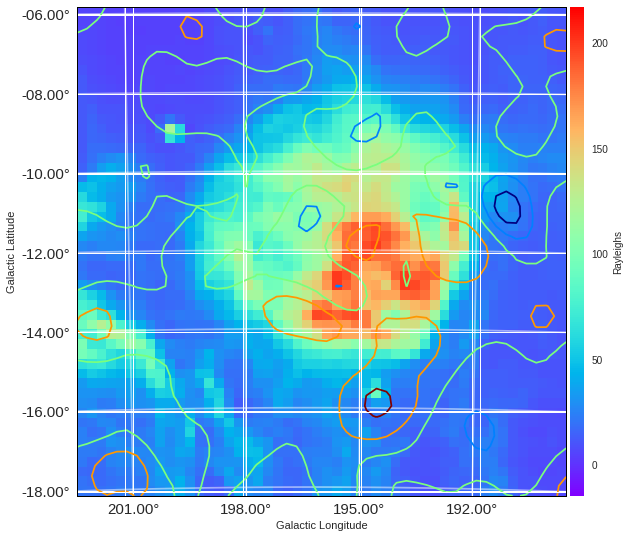

# N(H)

# Planck-COMMANDER AME (1and2)

In [ ]:
#fits_display(hdr_temp)
ame2_img = fits_display("/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME2_I_256.fits")
#freq_levels = range(10,25)
#print freq_levels

ame2_img.show_contour('/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME1_freq.fits',
 #                    levels = freq_levels,
                     smooth = 1)



In [ ]:
out_path = '/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_WMAP23.fits'

hp_path = '../Data/raw/WMAP/wmap_band_imap_r9_5yr_K_v3.fits'
hdr_temp = "/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME1_I_256.fits"

wmap30_img = make_fits_cutout(hdr_temp, 
                 hp_path, 
                 out_path)
wmap30_img.show_contour('/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME1_freq.fits',
 #                    levels = freq_levels,
                     smooth = 1)

In [ ]:
#fits_display(hdr_temp)
ameC_img = fits_display("/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME2_I_256.fits")
#freq_levels = range(10,25)
#print freq_levels

ameC_img.show_contour('/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME1_freq.fits',
 #                    levels = freq_levels,
                     smooth = 1)



### Planck-COMMANDER AME1 (Freq)

Using Python 2.7.12 |Anaconda 2.4.0 (64-bit)| (default, Jul  2 2016, 17:42:40) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Ignoring BLANK HEALPixels of value -1637499999999999923489519697920.
786432 HEALPixels in the whole map.
Coordinates frame is '<Galactic Frame>'.
3713 HEALPixels in the WCS wrapper polygon.


INFO: Auto-setting vmin to  1.402e+01 [aplpy.core]
INFO: Auto-setting vmax to  2.447e+01 [aplpy.core]


NameError: name 'ame1_snr' is not defined

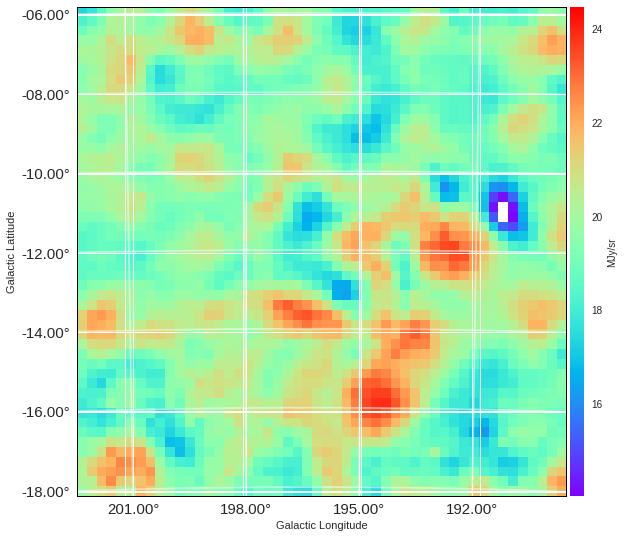

In [212]:
out_path = '/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME1_freq.fits'
hp_path = '/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/raw/COM_CompMap_AME-commander_0256_R2.00_var_FREQ_MEAN.fits'
hdr_temp = "/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME1_I_256.fits"

make_fits_cutout(hdr_temp, 
                 hp_path, 
                 out_path)

plt.imshow(
    np.reshape(
        ame1_snr, (50,50)
        ), 
    cmap="rainbow")

plt.colorbar()
plt.show()
plt.hist(hp.read_map())
plt.show()

# LFI 30 GHz

In [ ]:
out_path = '/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_LFI30.fits'

hp_path = '/work1/users/aaronb/Codebrary/Python/Projects/PlanckPCA/data/planck/LFI_SkyMap_030-BPassCorrected_0256_R2.01_full.fits'
hdr_temp = "/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME1_I_256.fits"

lfi30_img = make_fits_cutout(hdr_temp, 
                 hp_path, 
                 out_path)

lfi30_img.show_contour('/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME1_freq.fits',
                     levels = freq_levels,
                     smooth = 1)

# Haslam 408 MHz

Note the maxima at 195, -12 - perhaps synchrotron emission driven by the magnetic field of Meissa itself?
In this pixel scale, the beam PSF is approximately 1 degree wide (we have not investigated the exact effective PSF shape, for this HEALPix regridding of the Haslam data.) We can say counterparts to this maxima in all of the images of the Meissa-ring region. The one exception is the H-alpha map; such a maxima may be obscured, since the surronding 4-degree region (essentially, everything inside of the molecular ring) is bright in H-alpha.

In [ ]:
out_path = '/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_haslam.fits'

hp_path = '/work1/users/aaronb/Codebrary/Python/Projects/PlanckPCA/data/radio/haslam408_dsds_Remazeilles2014.fits'
hdr_temp = "/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME1_I_256.fits"

haslam408_img = make_fits_cutout(hdr_temp, 
                 hp_path, 
                 out_path)


haslam408_img.show_contour('/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME1_freq.fits',
                     levels = freq_levels,
                     smooth = 1)

# LFI 70 GHz

Using Python 2.7.12 |Anaconda 2.4.0 (64-bit)| (default, Jul  2 2016, 17:42:40) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
NSIDE = 256
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
Ignoring BLANK HEALPixels of value -1637499999999999923489519697920.
786432 HEALPixels in the whole map.
Coordinates frame is '<Galactic Frame>'.
3713 HEALPixels in the WCS wrapper polygon.


INFO: Auto-setting vmin to -2.339e-04 [aplpy.core]
INFO: Auto-setting vmax to  1.842e-04 [aplpy.core]


NameError: name 'freq_levels' is not defined

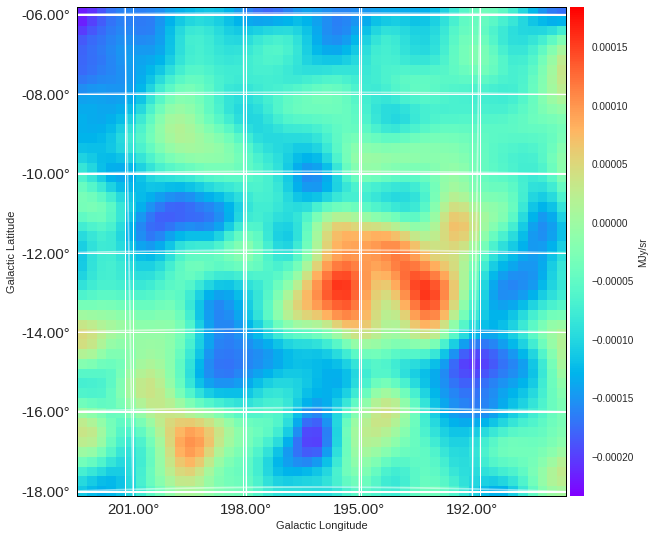

In [213]:
out_path = '/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_LFI70.fits'

hp_path = '/work1/users/aaronb/Codebrary/Python/Projects/PlanckPCA/data/planck/LFI_SkyMap_070-BPassCorrected_0256_R2.01_full.fits'
hdr_temp = "/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME1_I_256.fits"

lfi70_img = make_fits_cutout(hdr_temp, 
                 hp_path, 
                 out_path)

lfi70_img.show_contour('/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME1_freq.fits',
                     levels = freq_levels,
                     smooth = 1)
#lfi70_img.

# Planck 857 GHz

In [ ]:


out_path = '/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_HFI857.fits'

hp_path = '/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/raw/planck_857_256_1dres.fits.gz'
hdr_temp = "/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME1_I_256.fits"

hfi857_img = make_fits_cutout(hdr_temp, 
                 hp_path, 
                 out_path)

hfi857_img.show_contour('/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME1_freq.fits',
                     levels = freq_levels,
                     smooth = 1)

Using Python 2.7.12 |Anaconda 2.4.0 (64-bit)| (default, Jul  2 2016, 17:42:40) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Ignoring BLANK HEALPixels of value -1637499999999999923489519697920.
786432 HEALPixels in the whole map.
Coordinates frame is '<Galactic Frame>'.
3713 HEALPixels in the WCS wrapper polygon.


INFO: Auto-setting vmin to -1.319e-01 [aplpy.core]
INFO: Auto-setting vmax to  1.779e+01 [aplpy.core]


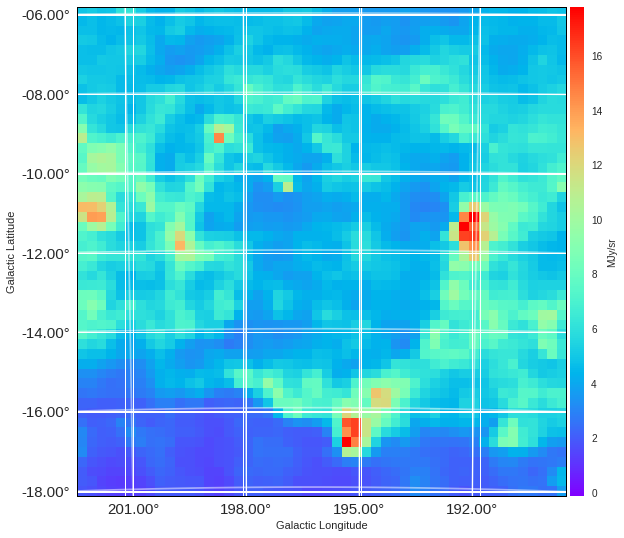

In [214]:


out_path = '/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_HFI545.fits'

hp_path = '/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/raw/planck_545_256_1dres.fits.gz'
hdr_temp = "/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME1_I_256.fits"

make_fits_cutout(hdr_temp, 
                 hp_path, 
                 out_path)

In [215]:
make_fits_cutout(hdr_temp, 
                 hp_path, 
                 out_path,
                 field=1)

Using Python 2.7.12 |Anaconda 2.4.0 (64-bit)| (default, Jul  2 2016, 17:42:40) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
NSIDE = 256
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


IndexError: list index out of range

In [ ]:


out_path = '/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_COMMANDERff.fits'

hp_path = '/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/raw/COM_CompMap_freefree-commander_0256_R2.00.fits.gz'
hdr_temp = "/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME1_I_256.fits"

ff_img = make_fits_cutout(hdr_temp, 
                 hp_path, 
                 out_path,
                 field=0)

ff_img.show_contour('/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME1_freq.fits',
                     levels = freq_levels,
                     smooth = 1)

out_path = '/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_COMMANDERff_rms.fits'


ff_rms_img = make_fits_cutout(hdr_temp, 
                 hp_path, 
                 out_path,
                 is_sigma=True,
                 field=2)

ff_rms_img.show_contour('/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME1_freq.fits',
                     levels = freq_levels,
                     smooth = 1)


Using Python 2.7.12 |Anaconda 2.4.0 (64-bit)| (default, Jul  2 2016, 17:42:40) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
NSIDE = 256
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
Ignoring BLANK HEALPixels of value -1637499999999999923489519697920.
786432 HEALPixels in the whole map.
Coordinates frame is '<Galactic Frame>'.
3713 HEALPixels in the WCS wrapper polygon.


INFO: Auto-setting vmin to  5.274e+01 [aplpy.core]
INFO: Auto-setting vmax to  1.109e+03 [aplpy.core]


NameError: name 'freq_levels' is not defined

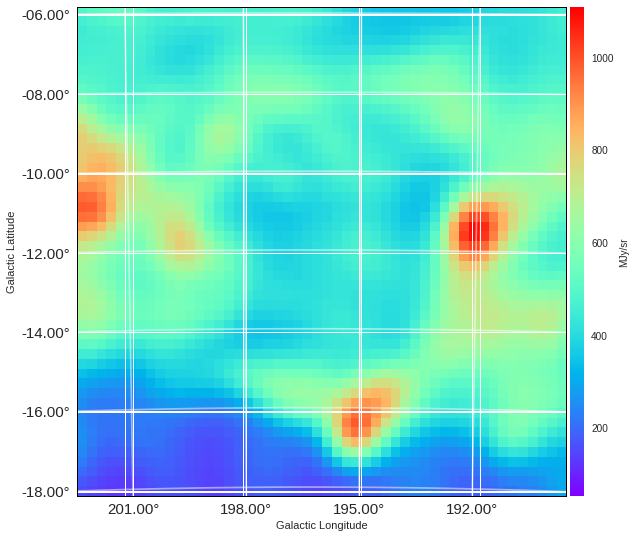

In [255]:


out_path = '/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_PR2_Idust.fits'

hp_path = '/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/raw/COM_CompMap_dust-commander_0256_R2.00.fits.gz'
hdr_temp = "/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME1_I_256.fits"

pr2Idust_img = make_fits_cutout(hdr_temp, 
                 hp_path, 
                 out_path,
                 field=0)



In [ ]:
out_path = '/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_PR1_rad.fits'
hp_path = '/work1/users/aaronb/Databrary/HEALPix/HFI_CompMap_ThermalDustModel_2048_R1.20.fits'
hdr_temp = "/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME1_I_256.fits"

make_fits_cutout(hdr_temp, 
                 hp_path, 
                 out_path,
                 field=3)

# AMEvar Peak Intensity

Using Python 2.7.12 |Anaconda 2.4.0 (64-bit)| (default, Jul  2 2016, 17:42:40) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
NSIDE = 256
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
Ignoring BLANK HEALPixels of value -1637499999999999923489519697920.
786432 HEALPixels in the whole map.
Coordinates frame is '<Galactic Frame>'.
3713 HEALPixels in the WCS wrapper polygon.


INFO: Auto-setting vmin to -2.466e+04 [aplpy.core]
INFO: Auto-setting vmax to  2.933e+05 [aplpy.core]


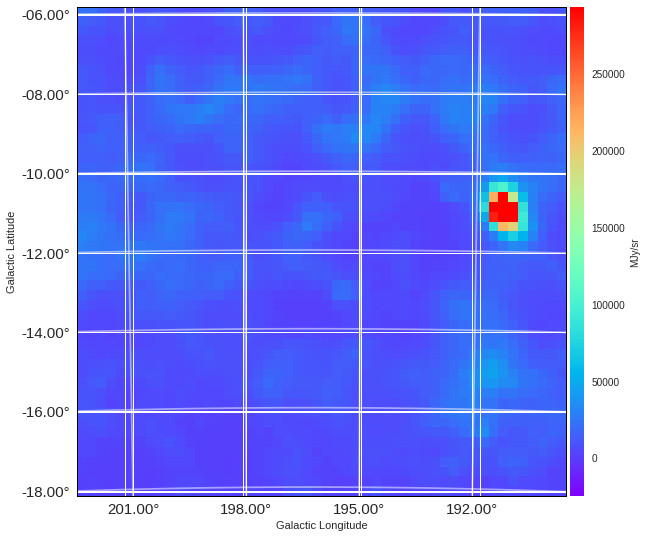

In [254]:
out_path = '/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AMEvar_IPeak.fits'
hp_path = '/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/raw/COM_CompMap_AME-commander_0256_R2.00_var_PEAK_I.fits'
hdr_temp = "/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME1_I_256.fits"

make_fits_cutout(hdr_temp, 
                 hp_path, 
                 out_path,
                 field=0)

In [ ]:
import astropy.io.fits as fits
ame1_I = fits.getdata('/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME1_I_256.fits').flatten()
ame1_I_rms = fits.getdata('/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME1_Irms_256.fits').flatten()
ff_I = fits.getdata('/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_COMMANDERff.fits').flatten()
ff_I_rms = fits.getdata('/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_COMMANDERff_rms.fits').flatten()


sb.jointplot(ame1_I_rms, ff_I_rms, kind = "hex")

In [ ]:
ame1_snr = ame1_I / ame1_I_rms
ff_snr = ff_I / ff_I_rms
sb.jointplot( ame1_snr , ff_snr, kind = 'kde' )
sb.jointplot( ame1_I , ff_snr, kind = 'kde' )

In [ ]:
sb.jointplot( ame1_I , ff_I_rms, kind = 'kde' )

In [ ]:
sb.jointplot( ame1_I , ff_I, kind = 'kde' )

In [ ]:
import matplotlib.pylab as plt
import numpy as np
plt.imshow(np.reshape(ame1_snr, (50,50)), cmap="rainbow")
plt.colorbar()
plt.show()
plt.hist(ame1_I_rms)
plt.show()

In [ ]:
plt.imshow(np.reshape(ff_snr, (50,50)), cmap="rainbow_r")
plt.colorbar()
plt.show()
plt.hist(ff_I_rms)
plt.show()

In [ ]:
PR2_Idust = fits.getdata('/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_PR2_Idust.fits').flatten()

In [ ]:
ame_rad_ratio = ame1_I / PR2_Idust
ame_rad_diff = ame1_I - PR2_Idust


In [ ]:
plt.imshow(np.reshape(ame_rad_ratio, (50,50)), cmap="rainbow")
plt.colorbar()
plt.show()
plt.hist(ame_rad_ratio)
plt.show()

In [ ]:
plt.imshow(np.reshape(ame_rad_diff, (50,50)), cmap="rainbow")
plt.colorbar()
plt.show()
plt.hist(ame_rad_diff)
plt.show()

In [191]:
import numpy as np
import pandas as pd
import astropy.io.fits as fits
lori_df = pd.DataFrame()
lori_df_mask = pd.DataFrame()
lori_df['A9']  = fits.getdata('/work1/users/aaronb/Codebrary/Python/Projects/DIRBE_IRAS_Check/data/LOri_akari_9_256.fits').flatten()
lori_df['D12']  = fits.getdata('/work1/users/aaronb/Codebrary/Python/Projects/DIRBE_IRAS_Check/data/LOri_dirbe_12_256.fits').flatten()
lori_df['I12']  = fits.getdata('/work1/users/aaronb/Codebrary/Python/Projects/DIRBE_IRAS_Check/data/LOri_iras_12_256.fits').flatten()
lori_df['A18'] = fits.getdata('/work1/users/aaronb/Codebrary/Python/Projects/DIRBE_IRAS_Check/data/LOri_akari_18_256.fits').flatten()
lori_df['D25']  = fits.getdata('/work1/users/aaronb/Codebrary/Python/Projects/DIRBE_IRAS_Check/data/LOri_dirbe_25_256.fits').flatten()
lori_df['I25']  = fits.getdata('/work1/users/aaronb/Codebrary/Python/Projects/DIRBE_IRAS_Check/data/LOri_iras_25_256.fits').flatten()
lori_df['D60'] = fits.getdata('/work1/users/aaronb/Codebrary/Python/Projects/DIRBE_IRAS_Check/data/LOri_dirbe_60_256.fits').flatten()
lori_df['A65'] = fits.getdata('/work1/users/aaronb/Codebrary/Python/Projects/DIRBE_IRAS_Check/data/LOri_akari_65_256.fits').flatten()
lori_df['A90'] = fits.getdata('/work1/users/aaronb/Codebrary/Python/Projects/DIRBE_IRAS_Check/data/LOri_akari_90_256.fits').flatten()
lori_df['A140'] = fits.getdata('/work1/users/aaronb/Codebrary/Python/Projects/DIRBE_IRAS_Check/data/LOri_akari_140_256.fits').flatten()
lori_df['A160'] = fits.getdata('/work1/users/aaronb/Codebrary/Python/Projects/DIRBE_IRAS_Check/data/LOri_akari_160_256.fits').flatten()
lori_df['P857'] = fits.getdata('/work1/users/aaronb/Codebrary/Python/Projects/DIRBE_IRAS_Check/data/LOri_planck_857_256.fits').flatten()
lori_df['P545'] = fits.getdata('/work1/users/aaronb/Codebrary/Python/Projects/DIRBE_IRAS_Check/data/LOri_planck_545_256.fits').flatten()
#lori_df['AMEfix'] = fits.getdata('/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME2_I_256.fits').flatten()
#lori_df['AMEvar'] = fits.getdata('/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AMEvar_IPeak.fits').flatten()
lori_df['AME1'] = fits.getdata('/work1/users/aaronb/Codebrary/latex/CosmicDust/Data/LOri_AME1_I_256.fits').flatten()
lori_df_mask['mask'] = fits.getdata('/work1/users/aaronb/Codebrary/Python/Projects/DIRBE_IRAS_Check/data/LOri_256_mask.fits').flatten()



In [192]:
lori_df_mask['mask'][lori_df['D12']>=1.3] = np.nan
#lori_df_mask['mask'][lori_df['AMEvar']>=5e4] = np.nan

for i in range(0, len(lori_df_mask['mask']) ):
    
    if np.isnan(lori_df_mask['mask'].iloc[i]):
    
        #print 'NaNpix at {}'.format(i)
        lori_df.iloc[i] = np.nan
        

        

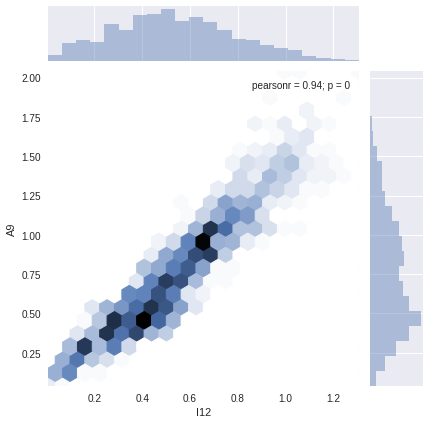

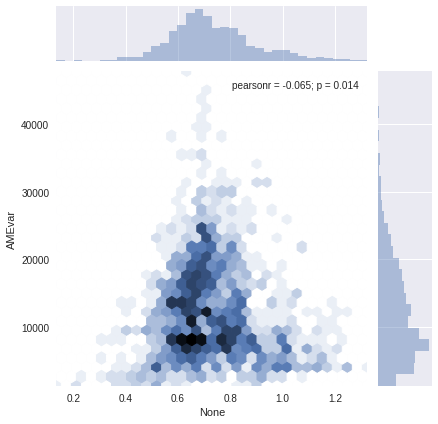

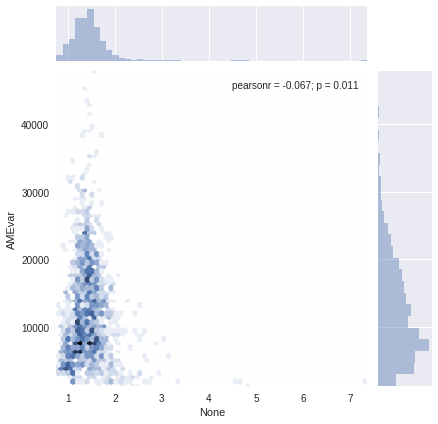

In [29]:
sb.jointplot(lori_df.I12-0.95, 
             lori_df.A9, 
             kind='hex')

# sb.jointplot((lori_df.I12-0.95).divide(lori_df.A9), 
#              lori_df.A9, 
#              kind='hex')

sb.jointplot((lori_df.I12-0.95).divide(lori_df.A9), 
             lori_df.AMEvar, 
             kind='hex')

sb.jointplot((lori_df.A9).divide(lori_df.I12-0.95), 
             lori_df.AMEvar, 
             kind='hex')

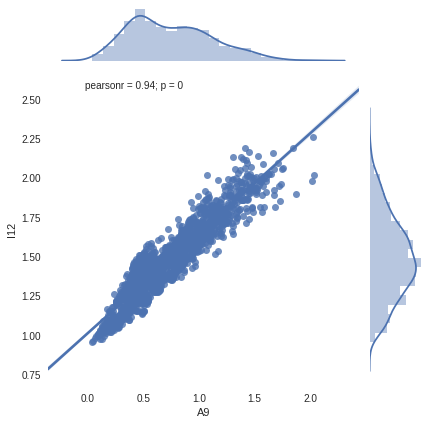

In [114]:
sb.jointplot(lori_df.A9, 
             lori_df.I12,
             kind = 'reg')


/work1/users/aaronb/Softbrary/Anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


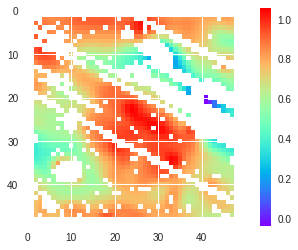

/work1/users/aaronb/Softbrary/Anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


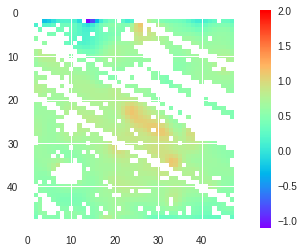

/work1/users/aaronb/Softbrary/Anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys


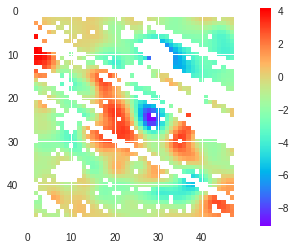

In [253]:
plt.imshow(lori_df.I12.reshape(50,50)-lori_df.A9.reshape(50,50), cmap=cmap)
plt.colorbar()
plt.show()
plt.imshow((lori_df.I12.reshape(50,50)-1)/lori_df.A9.reshape(50,50),vmax = 2.0, cmap=cmap)
plt.colorbar()
plt.show()
plt.imshow(lori_df.A160.reshape(50,50)-lori_df.A140.reshape(50,50), cmap=cmap)
plt.colorbar()
plt.show()

/work1/users/aaronb/Softbrary/Anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


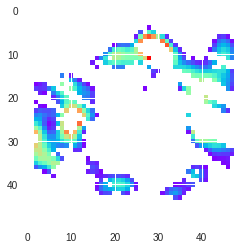

In [226]:
plt.imshow(lori_df.I12.reshape(50,50), vmin = 1.6, cmap=cmap)

/work1/users/aaronb/Softbrary/Anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


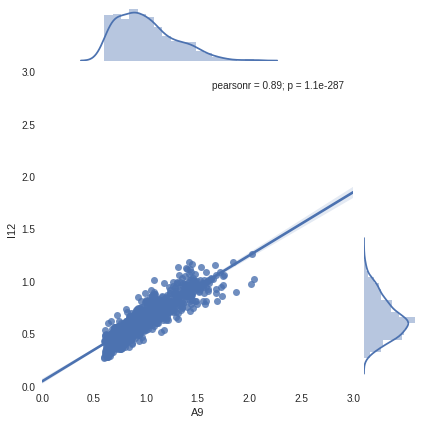

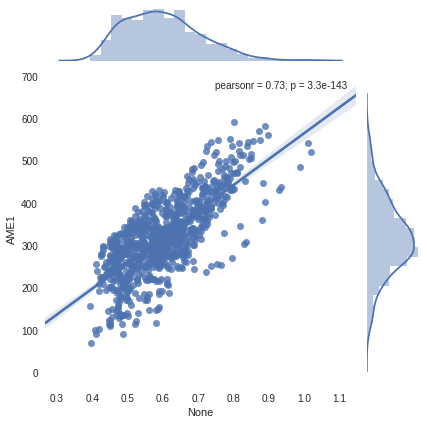

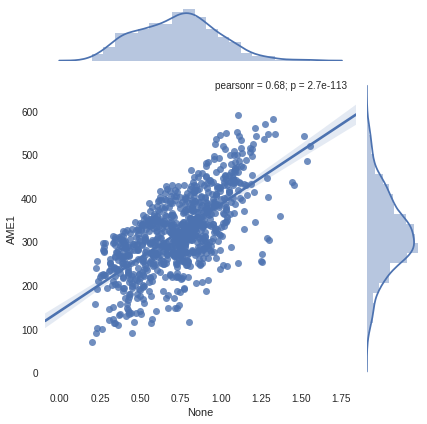

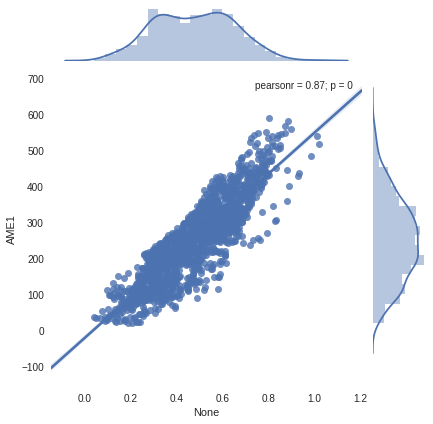

In [242]:
bgmask = np.where(lori_df.A9.values > 0.6)

sb.jointplot(lori_df.A9.iloc[bgmask], 
             lori_df.I12.iloc[bgmask]-1.,
             kind = 'reg',
            xlim=(0,3),
            ylim=(0,3))


sb.jointplot(lori_df.A9.iloc[bgmask].divide(lori_df.I12.iloc[bgmask]), 
             lori_df.AME1.iloc[bgmask],
             kind = 'reg')

sb.jointplot((lori_df.A9.iloc[bgmask]-0.5).divide(lori_df.I12.iloc[bgmask]-1), 
             lori_df.AME1.iloc[bgmask],
             kind = 'reg')




In [ ]:
# Bootstrap analysis correlation tests:

In [202]:
import numpy.random as npr
from scipy import stats

def bootstrap(data_x, 
              data_y, 
              iterations,  
              kind='Pearson'):
    
    
    #"""Returns bootstrap estimate of 100.0*(1-alpha) CI for statistic."""
    
    #data_x_dropna = data_x[(np.isfinite(data_x)==True) & (np.isfinite(data_y)==True)].copy()
    #data_y_dropna = data_y[(np.isfinite(data_x)==True) & (np.isfinite(data_y)==True)].copy()
    
    
    nx = len(data_x)
    ny = len(data_y)

    print "Found {} valid samples (not NaN)".format(nx)
    #print "Found {} valid samples (not NaN)".format(ny)
    #print data_x_dropna
    
    corr_coeff_array = np.ones(iterations)
    
    if kind == 'Spearman':
    
        for i in range(0,iterations):
            
            idx = npr.randint(0, nx, nx)

            stat_r, stat_p = scipy.stats.spearmanr(data_x.iloc[idx],
                                                   data_y.iloc[idx])
            corr_coeff_array[i] = stat_r
    
    elif kind == 'Pearson':
            
        for i in range(0,iterations):
            
            idx = npr.randint(0, nx, nx)
            stat_r, stat_p = scipy.stats.pearsonr(data_x.iloc[idx],
                                                  data_y.iloc[idx])
            corr_coeff_array[i] = stat_r

    #print corr_coeff_array
    return corr_coeff_array



def bootstrap_run(X1_data, 
                  X2_data, 
                  Y_data,
                  kind='Pearson', 
                  iterations=10000, 
                  title=None, 
                  X1_label=None, 
                  X2_label=None,
                  ftitle='Bootstrap' ):
    
        ## Force background color to be white:
    ### Note that seaborn plotting functions my override these settings.
    plt.rcParams['axes.facecolor']='white'
    plt.rcParams['figure.facecolor']='white'
    plt.rcParams['savefig.facecolor']='white'
    
    
    corr_array_X1 = bootstrap( X1_data,
                               Y_data, 
                               iterations, 
                               kind=kind)

    corr_array_X2 = bootstrap( X2_data,
                               Y_data, 
                               iterations, 
                               kind=kind)
    
    X1 = corr_array_X1.copy()
    X2 = corr_array_X2.copy()
    
    
    #print len(X1)
    #print len(X2)
    
    t, prob = scipy.stats.ttest_ind(X1,
                                    X2, 
                                    axis=0, 
                                    equal_var=True) #Equal_var=False for Welch's t-test
    # make plots
    
    plt.figure(figsize=(6,6))

    round_it = 3

    bins = np.linspace(0.5, 1.0, 100)

    plt.hist(X1, bins, alpha=0.5, color= 'r', label=X1_label +" "+ 
                                           str(round(np.nanmean(X1),round_it)) + " +/- " +  
                                           str(round(np.nanstd(X1),round_it)) )
    plt.hist(X2, bins, alpha=0.5, color= 'b', label=X2_label+" "+ 
                                           str(round(np.nanmean(X2),round_it)) + " +/- " +  
                                           str(round(np.nanstd(X2),round_it))
                                            + "\n" + "t-stat: "+ 
                                                       str(round(t,1))+", p-value: "+   str(round(prob,6)))
    plt.ylabel("Count", fontsize=20)
    plt.xlabel("$r_{s}$", fontsize=20)

    
    plt.legend(loc='upper left')
    
    #plt.savefig("../Plots/"+ftitle)
    plt.show()


     

In [184]:
idx = npr.randint(0, 1447,1447)

In [185]:
scipy.stats.spearmanr(lori_df.A9.dropna().iloc[idx],lori_df.A9.dropna().iloc[idx])

SpearmanrResult(correlation=1.0, pvalue=0.0)

Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)


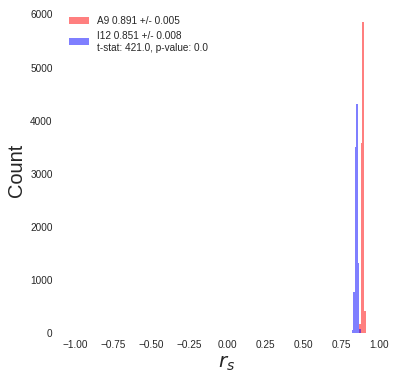

In [197]:
iterations = 10000

X1_data  = lori_df.A9.dropna()
X2_data  = lori_df.I12.dropna()
Y_data   = lori_df.AME1.dropna()
X1_label = X1_data.name
X2_label = X2_data.name
Y_label  =  Y_data.name
ftitle = "AME and MIR bootstrap"
kind = 'Pearson'
bootstrap_run(
    X1_data, 
    X2_data, 
    Y_data, 
    kind=kind, 
    X1_label = X1_label, 
    X2_label = X2_label, 
    iterations=iterations, 
    ftitle=ftitle)
plt.savefig('../Plots/ch_lori/A9andP545vsAMEvar_bootstrap_i100.pdf')

Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)


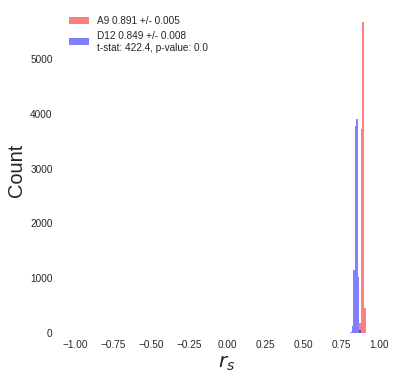

In [198]:
iterations = 10000

X1_data  = lori_df.A9.dropna()
X2_data  = lori_df.D12.dropna()
Y_data   = lori_df.AME1.dropna()
X1_label = X1_data.name
X2_label = X2_data.name
Y_label  =  Y_data.name
ftitle = "AME and MIR bootstrap"
kind = 'Pearson'
bootstrap_run(
    X1_data, 
    X2_data, 
    Y_data, 
    kind=kind, 
    X1_label = X1_label, 
    X2_label = X2_label, 
    iterations=iterations, 
    ftitle=ftitle)
plt.savefig('../Plots/ch_lori/A9andP545vsAMEvar_bootstrap_i100.pdf')

In [292]:
lori_bootstraps_spearman = pd.DataFrame()

for band in lori_df.columns:
    lori_bootstraps_spearman[band] = bootstrap(lori_df[band].dropna(),
                            lori_df['AME1'].dropna(),
                            1000,
                             kind='Spearman')
    


Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)


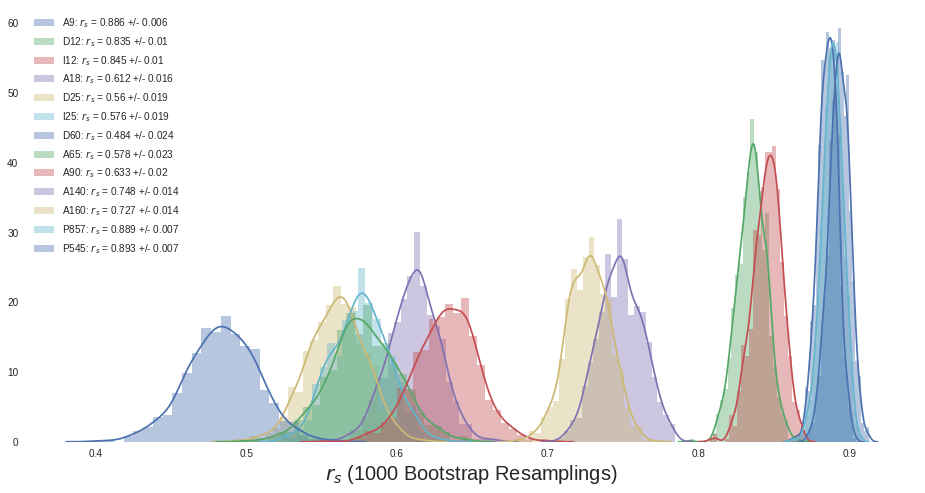

In [293]:
plt.figure(figsize=(16,8))
for band in (lori_bootstraps_spearman.drop('AME1',axis=1).columns):
    
    sb.distplot(lori_bootstraps_spearman[band], 
                label=band+': $r_s$ = {} +/- {}'
                    .format(round(np.mean(lori_bootstraps_spearman[band]),3),
                            round(np.std(lori_bootstraps_spearman[band]),3)
                                ))
    #plt.text(np.mean(lori_bootstraps[band]), 90, band)
plt.xlabel('$r_s$ (1000 Bootstrap Resamplings) ',  fontsize = 20)
plt.legend()
plt.savefig('../Plots/ch_lori/bootstrap_vs_AME_spearman_i1000.pdf')

In [294]:
lori_bootstraps_pearson = pd.DataFrame()

for band in lori_df.columns:
    lori_bootstraps_pearson[band] = bootstrap(lori_df[band].dropna(),
                            lori_df['AME1'].dropna(),
                            1000,
                             kind='Pearson')
    


Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)


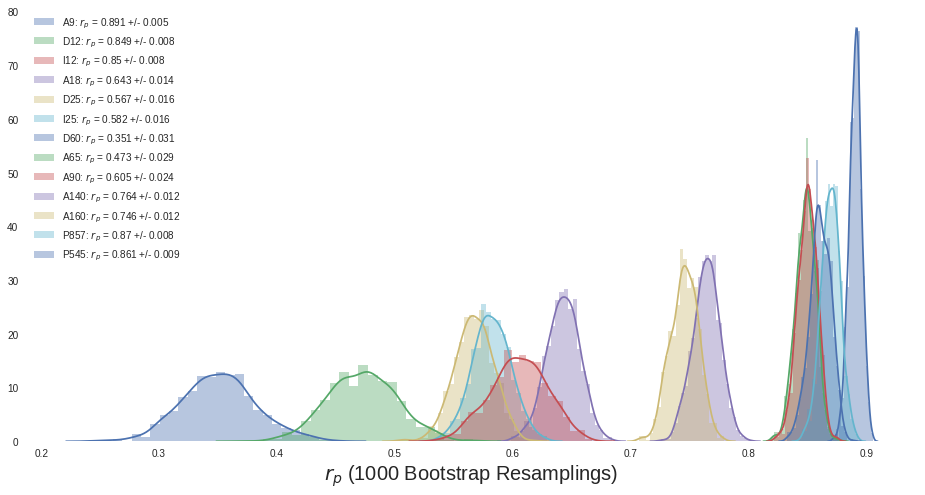

In [295]:
plt.figure(figsize=(16,8))
for band in (lori_bootstraps_pearson.drop('AME1',axis=1).columns):
    
    sb.distplot(lori_bootstraps_pearson[band], 
                label=band+': $r_p$ = {} +/- {}'
                    .format(round(np.mean(lori_bootstraps_pearson[band]),3),
                            round(np.std(lori_bootstraps_pearson[band]),3)
                                ))
    #plt.text(np.mean(lori_bootstraps[band]), 90, band)
plt.xlabel('$r_p$ (1000 Bootstrap Resamplings) ', fontsize = 20)
plt.legend()
plt.savefig('../Plots/ch_lori/bootstrap_vs_AME_pearson_i1000.pdf')

In [ ]:
lori_bootstraps = pd.DataFrame()

for band_other lori_df.columns:
    for band in lori_df.columns:
        lori_bootstraps[band] = bootstrap(lori_df[band].dropna(),
                                lori_df[band_other].dropna(),
                                1000,
                                 kind='Pearson')
    


Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)


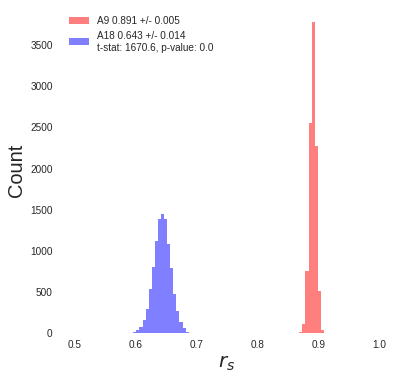

In [203]:
iterations = 10000

X1_data  = lori_df.A9.dropna()
X2_data  = lori_df.A18.dropna()
Y_data   = lori_df.AME1.dropna()
X1_label = X1_data.name
X2_label = X2_data.name
Y_label  =  Y_data.name
ftitle = "AME and MIR bootstrap"
kind = 'Pearson'
bootstrap_run(
    X1_data, 
    X2_data, 
    Y_data, 
    kind=kind, 
    X1_label = X1_label, 
    X2_label = X2_label, 
    iterations=iterations, 
    ftitle=ftitle)
plt.savefig('../Plots/ch_lori/A9andP545vsAMEvar_bootstrap_i100.pdf')

Found 1453 valid samples (not NaN)
Found 1453 valid samples (not NaN)


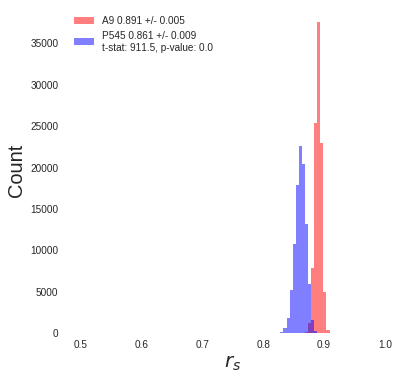

In [204]:
iterations = 100000

X1_data  = lori_df.A9.dropna()
X2_data  = lori_df.P545.dropna()
Y_data   = lori_df.AME1.dropna()
X1_label = X1_data.name
X2_label = X2_data.name
Y_label  =  Y_data.name
ftitle = "AME and MIR bootstrap"
kind = 'Pearson'
bootstrap_run(
    X1_data, 
    X2_data, 
    Y_data, 
    kind=kind, 
    X1_label = X1_label, 
    X2_label = X2_label, 
    iterations=iterations, 
    ftitle=ftitle)
plt.savefig('../Plots/ch_lori/A9andP545vsAMEvar_bootstrap_i100.pdf')

In [ ]:
for band in lori_df.columns:
    
    

In [33]:
sb.distplot(lori_df.drop(['AMEvar','AMEfix'], axis=1).dropna())

NameError: name 'sb' is not defined

In [219]:
lori_df_bgcorr = pd.DataFrame()

for band in lori_df.columns:
    lori_df_bgcorr[band] = lori_df[band] - lori_df[band].min()

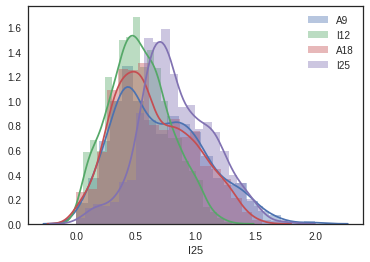

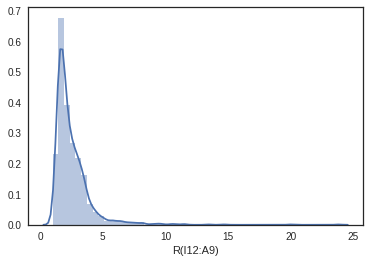

TypeError: string indices must be integers, not Series

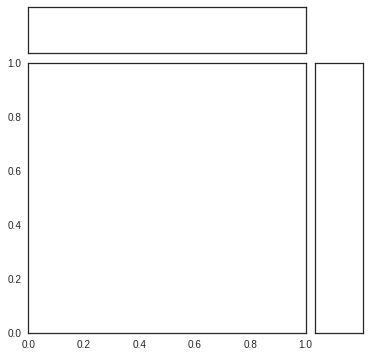

In [220]:
with sb.axes_style("white"):
    
    # Distribution of MIR bands:
    sb.distplot(lori_df_bgcorr.A9.dropna(), label= 'A9')
    sb.distplot(lori_df_bgcorr.I12.dropna(),label= 'I12')
    sb.distplot(lori_df_bgcorr.A18.dropna(),label= 'A18')
    sb.distplot(lori_df_bgcorr.I25.dropna(),label= 'I25')
    plt.legend()
    plt.show()
    
    
    # Distribution of R(I12:A9):
    #lori_df_bgcorr['R(I12:A9)'] = ((lori_df_bgcorr.I12).divide(lori_df_bgcorr.A9))
    #lori_df_bgcorr['R(A9:I12)'] = ((lori_df_bgcorr.A9).divide(lori_df_bgcorr.I12))
    lori_df_bgcorr['R(I12:A9)'] = ((lori_df.I12).divide(lori_df.A9))
    lori_df_bgcorr['R(A9:I12)'] = ((lori_df.A9).divide(lori_df.I12))




    sb.distplot(lori_df_bgcorr['R(I12:A9)'].dropna())
    plt.show()

    sb.jointplot(data=lori_df_bgcorr.dropna(),
                   x= 'R(I12:A9)',
                   y='AMEvar',
                kind = 'hex')
    plt.show()
    
    sb.jointplot(data=lori_df_bgcorr.dropna(),
                   x= 'R(I12:A9)',
                   y='AMEfix', 
                 kind = 'hex')
    plt.show()
    
    sb.distplot(lori_df_bgcorr['R(A9:I12)'].dropna())
    plt.show()

    sb.jointplot(data=lori_df_bgcorr.dropna(),
                   x= 'R(A9:I12)',
                   y='AMEvar',
                kind = 'hex')
    plt.show()
    
    sb.jointplot(data=lori_df_bgcorr.dropna(),
                   x= 'R(A9:I12)',
                   y='AMEfix', 
                 kind = 'hex')
    plt.show()

In [ ]:
with sb.axes_style("white"):
    sb.distplot(lori_df.A9.dropna(),label='A9')

In [ ]:
plt.imshow(np.reshape(lori_df['A9'].values,(50,50)))

In [ ]:
plt.imshow(np.reshape(lori_df['D12'].values,(50,50)))

In [ ]:
np.isnan(lori_df_mask['mask'].iloc[6])

In [ ]:
import seaborn as sb
fig = plt.figure(figsize=(12,12))
sb.heatmap(lori_df.corr(method='spearman'), 
           annot=True,
          square=True,
           cbar=False)
fig.savefig('  ')
fig.savefig('../Plots/png/Allsky_corr_Lori.png')

In [ ]:
corrmatrix = lori_df.drop(['I12'], axis=1).divide(lori_df['I12'],axis=0).join(lori_df['AMEvar']).corr(method='spearman')

In [ ]:
fig = plt.figure(figsize=(12,12))

sb.heatmap(corrmatrix, 
           annot=True,
          square=True,
           cbar=False)

fig.savefig('../Plots/png/Lori_I12norm_crosscorr.png')
plt.show()


In [ ]:
sb.jointplot(lori_df.I25.divide(lori_df.A140,axis=0), lori_df['AME'], dropna=True,kind= "kde")
sb.jointplot(lori_df.D25.divide(lori_df.A140,axis=0), lori_df['AME'], dropna=True,kind= "kde")
fig.csb.jointplot(lori_df.A18.divide(lori_df.A140,axis=0), lori_df['AME'], dropna=True,kind= "kde")

In [ ]:
#fig = plt.figure()
a9i12ratio = pd.DataFrame()
a9i12ratio['A9:I12'] = lori_df['A9'].divide(lori_df['I12'],axis=0)
sb.jointplot(a9i12ratio['A9:I12'],
             lori_df['AME'], 
             kind= "kde")

plt.savefig('../Plots/png/Lori_A9I12.png')
plt.close()
plt.imshow(
    np.reshape(a9i12ratio.values, 
               [50,50])
              )


In [ ]:
sb.jointplot(pd.DataFrame(lori_df['A9'].divide(lori_df['I12'],axis=0),columns=["A9:I12"]),
             lori_df['AME'], 
             kind= "kde")

In [ ]:
nside = 256

hsize = hp.nside2npix(nside)
    
randsub = np.random.randint(low=0, high=hsize, size=hsize//500)

sb.jointplot(phot_mpsub['A9'].divide(phot_mpsub['I12'],axis=0).iloc[randsub],
             planck_mw['AME'].iloc[randsub], 
             kind= "hex",
            ylim=(0,50),
            xlim=(0,2))

In [ ]:
sb.jointplot(lori_df.A9, lori_df['D12'], kind= "kde")

In [ ]:
sb.jointplot(lori_df.A9.divide(lori_df['P545'],axis=0),lori_df['AME'], kind= "kde")

In [ ]:
sb.jointplot(lori_df.A9, lori_df['AME'], kind= "kde")

In [ ]:
sb.jointplot(lori_df.D12, lori_df['AME'], kind= "kde")

In [ ]:
# Fit background plane (example from astropy documentaiton): 
#http://docs.astropy.org/en/stable/modeling/

In [68]:
from sklearn.decomposition import FastICA, NMF
from matplotlib.colors import SymLogNorm



def doSeparation(df, method='ICA', n_components=5, randstate=42): #Combining the steps, making a general function for all 3 methods
    
    # Principal component analysis
    if method=='PCA':
        
        comps = PCA(n_components=n_components)
        model = pca.fit(X).transform(X)

    # Independent component analysis:
    elif method == 'ICA':
        rng = np.random.RandomState(randstate) # The simple "fast" ICA version needs a random number generation

        model = FastICA(random_state = rng, n_components=n_components)
        comps = model.fit(df.dropna()).transform(df.dropna()) # We can fit and transform in one line

        comps /= comps.std(axis=0)
        
    # Non-negative matrix factorization    
    elif method =='NMF':
    
        model = NMF(n_components=n_components)
        comps = model.fit(df.dropna()).transform(df)
        
        return comps, model
        

def visComps(comps, model, labels, title_prefix = "PC_"):
    

    for i in range(0,np.size(comps,axis=1)):
        #plt.subplot(5,4,i+1)
        #plt.figure(figsize=(20,20))
        
        try:
            title = title_prefix+str(i+1)+":  Explained Variance = "+str(
                round(model.explained_variance_ratio_[i]*100,2))+"%"
            
        except(AttributeError):
            title = title_prefix+str(i+1)
        
        plt.imshow(comps[:,i].reshape((50,50)), title= title,
                   cmap = cmap, 
                   norm=SymLogNorm(linthresh=0.01,
                                   linscale=1,vmin=0))

        
def plotComps(comps, model, labels, title_prefix = "PC_"):
    
    for i in range(0,np.size(comps,axis=1)):
        
        
        try:
            title = title_prefix+str(i+1)+":  Explained Variance = "+str(
                round(model.explained_variance_ratio_[i]*100,2))+"%"
            
        except(AttributeError):
            title = title_prefix+str(i+1)
        
        
        
        #x_ = range(0,np.size(model.components_,axis=1))
        x_ = [float(l) for l in labels]
        y_ = model.components_[i]
        y_unscaled = (y_*scaler.data_range_)+scaler.data_min_

        
        #fig, ax = plt.subplots()
            
        # create the general figure
        fig1 = plt.figure()
 
        # and the first axes using subplot populated with data 
        
        scatter1 = ax1.scatter(x_,y_, label="Scaled", c='blue')
        for i, txt in enumerate(labels):
            plt.annotate(labels[i], (x_[i],y_[i]))
        ax1.yaxis.tick_left()
        ax1.yaxis.set_label_position("left")
        
        plt.title(title)
        
        plt.show()
        plt.close()

In [69]:
doSeparation(lori_df)

In [83]:
type(lori_df['A9'][1])

numpy.float32

In [96]:
lori_df['A9'][~np.isnan(lori_df['A9'])]

0       5.0
1       5.0
2       5.0
3       5.0
4       5.0
5       5.0
6       5.0
7       5.0
8       5.0
9       5.0
10      5.0
11      5.0
12      5.0
13      5.0
14      5.0
15      5.0
16      5.0
17      5.0
18      5.0
19      5.0
20      5.0
21      5.0
22      5.0
23      5.0
24      5.0
25      5.0
26      5.0
27      5.0
28      5.0
29      5.0
       ... 
2470    5.0
2471    5.0
2472    5.0
2473    5.0
2474    5.0
2475    5.0
2476    5.0
2477    5.0
2478    5.0
2479    5.0
2480    5.0
2481    5.0
2482    5.0
2483    5.0
2484    5.0
2485    5.0
2486    5.0
2487    5.0
2488    5.0
2489    5.0
2490    5.0
2491    5.0
2492    5.0
2493    5.0
2494    5.0
2495    5.0
2496    5.0
2497    5.0
2498    5.0
2499    5.0
Name: A9, dtype: float32

In [3]:
y.shape

(128, 128)

In [5]:
x.shape

(128, 128)

In [7]:
y-x

array([[   0,   -1,   -2, ..., -125, -126, -127],
       [   1,    0,   -1, ..., -124, -125, -126],
       [   2,    1,    0, ..., -123, -124, -125],
       ..., 
       [ 125,  124,  123, ...,    0,   -1,   -2],
       [ 126,  125,  124, ...,    1,    0,   -1],
       [ 127,  126,  125, ...,    2,    1,    0]])

In [ ]:
lori_df